In [1]:
from matplotlib import pyplot as plt
import pandas as pd

import pickle
import os

In [2]:
DATA_PATH = os.path.join('..', 'data')
ENCODERS_PATH = os.path.join(DATA_PATH, 'encoders')
PRIMARY_PATH = os.path.join(DATA_PATH, 'primary')

ELECTION = 'pres-2021-1ra'

In [3]:
def get_labels(df, election):
    encoders_names = ['comunas', 'electorales', 'locales', 'mesas']
    labels = ['comuna', 'electoral', 'local', 'mesa']
    encoders = dict()
    for encoder in encoders_names:
        with open(os.path.join(ENCODERS_PATH, f'{encoder}-{election}.pkl'), 'rb') as f:
            encoders[encoder] = pickle.load(f)
    for label, encoder in zip(labels, encoders_names):
        df[label] = encoders[encoder].inverse_transform(df[label])
    return df

In [4]:
votacion = pd.read_parquet(os.path.join(PRIMARY_PATH, f'votacion-{ELECTION}.parquet'))
votacion = get_labels(votacion, ELECTION)
size = votacion.memory_usage(deep=True).sum().sum()/1024**2
print(f'Memory: {size:.2f} MB')
votacion

Memory: 48.23 MB


,region,senatorial,distrito,comuna,electoral,local,mesa,voto,cantidad
0,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,0,71
1,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,1,92
2,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,2,0
3,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,3,1
4,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,21M,0,82
...,...,...,...,...,...,...,...,...,...
186551,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9M,3,0
186552,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9V,0,43
186553,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9V,1,76
186554,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9V,2,0


In [5]:
grupos = pd.read_parquet(os.path.join(PRIMARY_PATH, f'grupos-{ELECTION}.parquet'))
grupos = get_labels(grupos, ELECTION)
size = grupos.memory_usage(deep=True).sum().sum()/1024**2
print(f'Memory: {size:.2f} MB')
grupos

Memory: 187.78 MB


,region,senatorial,distrito,comuna,electoral,local,mesa,sexo,edad,nacionalidad,votos
0,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,0,20,0,9
1,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,0,30,0,1
2,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,0,30,10,1
3,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,0,40,4,1
4,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,0,40,0,14
...,...,...,...,...,...,...,...,...,...,...,...
721922,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9V,1,30,0,6
721923,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9V,1,40,0,3
721924,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9V,1,50,0,4
721925,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9V,1,60,0,1


In [6]:
participacion = pd.read_parquet(os.path.join(PRIMARY_PATH, f'participacion-{ELECTION}.parquet'))
participacion = get_labels(participacion, ELECTION)
size = participacion.memory_usage(deep=True).sum().sum()/1024**2
print(f'Memory: {size:.2f} MB')
participacion

Memory: 12.09 MB


,region,senatorial,distrito,comuna,electoral,local,mesa,inscritos,votos
0,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,20M,333,164
1,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,21M,340,164
2,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,22M,341,152
3,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,23M,344,162
4,1,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ALTO HOSPICIO - ANEXO DE COLEGIO SAN ANTONIO D...,24M,342,178
...,...,...,...,...,...,...,...,...,...
46604,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,7V,333,164
46605,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,8M,317,144
46606,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,8V,328,168
46607,16,16,19,ÑIQUEN,ÑIQUEN,ÑIQUEN - LICEO POLIVALENTE SAN GREGORIO,9M,324,153


# EDA

In [7]:
votacion[['region', 'electoral']].drop_duplicates().value_counts('region').sort_index()

region
1     14
2     15
3     17
4     29
5     59
6     48
7     58
8     73
9     70
10    89
11    26
12    12
13    87
14    38
15     9
16    37
Name: count, dtype: int64

# Ley de Pareto

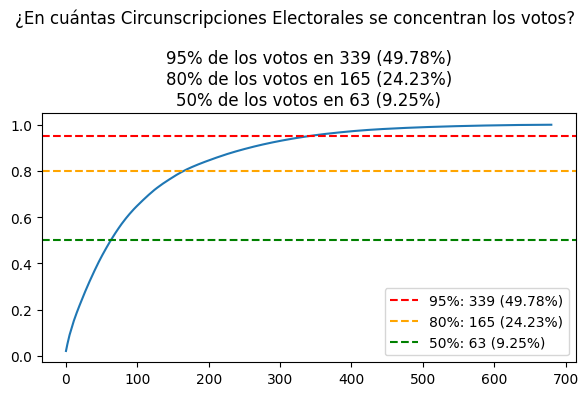

In [8]:
votos_electoral = votacion.groupby(['electoral']).cantidad.sum().reset_index()
cumsum = votos_electoral.cantidad.sort_values(ascending=False).cumsum()
cumsum = (cumsum/cumsum.max()).values
total = len(cumsum)
cut95 = (cumsum > 0.95).argmax()
cut80 = (cumsum > 0.8).argmax()
cut50 = (cumsum > 0.5).argmax()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(cumsum)
ax.axhline(0.95, color='red', linestyle='--', label=f'95%: {cut95} ({cut95/total:.2%})')
ax.axhline(0.8, color='orange', linestyle='--', label=f'80%: {cut80} ({cut80/total:.2%})')
ax.axhline(0.5, color='green', linestyle='--', label=f'50%: {cut50} ({cut50/total:.2%})')
ax.legend()
fig.suptitle('¿En cuántas Circunscripciones Electorales se concentran los votos?')
ax.set_title(
    f'95% de los votos en {cut95} ({cut95/total:.2%})\n'
    f'80% de los votos en {cut80} ({cut80/total:.2%})\n'
    f'50% de los votos en {cut50} ({cut50/total:.2%})'
)
fig.tight_layout()
plt.show()

# ¿Importa la mesa o local de votación?
- ¿El porcentaje de votos obtenidos por un candidato en una mesa o local de votación es proporcional al porcentaje de votos obtenidos por el candidato en la comuna?

In [9]:
perc_votos = votacion.groupby('voto').cantidad.sum()/votacion.cantidad.sum()
perc_votos

voto
0    0.551854
1    0.437083
2    0.002859
3    0.008204
Name: cantidad, dtype: float64

In [10]:
total_votos_electoral = votacion.groupby(['electoral']).cantidad.sum()
perc_votos_electoral = votacion.groupby(['electoral', 'voto']).cantidad.sum()/total_votos_electoral
perc_votos_electoral.head(1)

electoral   voto
AGUA SANTA  0       0.536303
Name: cantidad, dtype: float64

In [11]:
total_votos_local = votacion.groupby(['electoral', 'local']).cantidad.sum()
perc_votos_local = votacion.groupby(['electoral', 'local', 'voto']).cantidad.sum()/total_votos_local
perc_votos_local.head(1)

electoral   local                                      voto
AGUA SANTA  AGUA SANTA - COLEGIO FRIENDLY HIGH SCHOOL  0       0.503882
Name: cantidad, dtype: float64

In [12]:
diff_local_electoral = (
    perc_votos_local
    .reset_index()
    .join(perc_votos_electoral, on=['electoral', 'voto'], rsuffix='_electoral')
)
diff_local_electoral = diff_local_electoral.join(perc_votos, on='voto', rsuffix='_total')
diff_local_electoral['diff_local_electoral'] = diff_local_electoral.cantidad-diff_local_electoral.cantidad_electoral
diff_local_electoral['diff_local_total'] = diff_local_electoral.cantidad-diff_local_electoral.cantidad_total
diff_local_electoral['diff_electoral_total'] = diff_local_electoral.cantidad_electoral-diff_local_electoral.cantidad_total
diff_local_electoral['abs_diff_local_electoral'] = diff_local_electoral.diff_local_electoral.abs()
diff_local_electoral['abs_diff_local_total'] = diff_local_electoral.diff_local_total.abs()
diff_local_electoral['abs_diff_electoral_total'] = diff_local_electoral.diff_electoral_total.abs()
diff_local_electoral.head(3)

,electoral,local,voto,cantidad,cantidad_electoral,cantidad_total,diff_local_electoral,diff_local_total,diff_electoral_total,abs_diff_local_electoral,abs_diff_local_total,abs_diff_electoral_total
0,AGUA SANTA,AGUA SANTA - COLEGIO FRIENDLY HIGH SCHOOL,0,0.503882,0.536303,0.551854,-0.032420,-0.047972,-0.015552,0.032420,0.047972,0.015552
1,AGUA SANTA,AGUA SANTA - COLEGIO FRIENDLY HIGH SCHOOL,1,0.484266,0.449847,0.437083,0.034419,0.047184,0.012765,0.034419,0.047184,0.012765
2,AGUA SANTA,AGUA SANTA - COLEGIO FRIENDLY HIGH SCHOOL,2,0.002043,0.003874,0.002859,-0.001831,-0.000816,0.001015,0.001831,0.000816,0.001015


In [13]:
diff_local_electoral.query('abs_diff_local_electoral >= 0.05').shape[0]

665

In [14]:
diff_local_electoral.query('abs_diff_local_electoral <= 0.01').shape[0]

7672

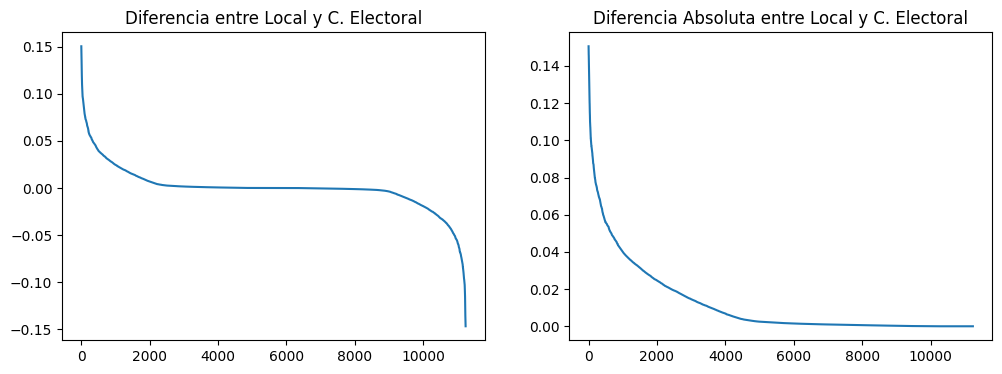

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
(
    diff_local_electoral
    .sort_values('diff_local_electoral', ascending=False)
    .diff_local_electoral
    .reset_index(drop=True)
    .plot(ax=ax[0])
)
ax[0].set_title('Diferencia entre Local y C. Electoral')
(
    diff_local_electoral
    .sort_values('abs_diff_local_electoral', ascending=False)
    .abs_diff_local_electoral
    .reset_index(drop=True)
    .plot(ax=ax[1])
)
ax[1].set_title('Diferencia Absoluta entre Local y C. Electoral')
plt.show()

La diferencia entre locales y Circunscripciones Electorales en votaciones no es significativa, por lo que se puede asumir que la distribución de votos en una Circunscripción Electoral es similar a la distribución de votos en un local de votación en la misma Circunscripción Electoral.

De los pares Local/Candidato, solo 665 de 11240 (~6%) tienen una diferencia absoluta de votos mayor al 5% con respecto al par Circunscripción Electoral/Candidato.

Además, 7762 de 11240 (~69%) de los pares Local/Candidato tienen una diferencia absoluta de votos menor al 1% con respecto al par Circunscripción Electoral/Candidato.